In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, KBinsDiscretizer

# Customer Churn Dataset

In [2]:
df = pd.read_csv('./data/cust_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [376]:
print(f'There are {df.shape} data in the dataset initially')

There are (7043, 21) data in the dataset initially


In [237]:
# checking to see the number of null values in the dataframe
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [238]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [377]:
# drop the missing labels in the dataset
print(len(df))

df.dropna(axis=0, subset=['Churn'])

print(len(df))

7043
7043


In [378]:
# drop the customer ID column in the dataset
df.drop('customerID', axis=1, inplace=True)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [379]:
# converting the labels(y) to numeric labels
label_encoder = preprocessing.LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [380]:
print("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


In [6]:
# checking to see if there is any white space in any of the columns, if so convert them to null value

def get_whitespace_count(df):
    columns = df.columns
    dict = {}
    for col in columns:
        dict[col] = df[col].str.isspace().sum() if df[col].dtype == 'object' else -1

    print(dict)

get_whitespace_count(df)

{'gender': 0, 'SeniorCitizen': -1, 'Partner': 0, 'Dependents': 0, 'tenure': -1, 'PhoneService': 0, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 0, 'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0, 'StreamingMovies': 0, 'Contract': 0, 'PaperlessBilling': 0, 'PaymentMethod': 0, 'MonthlyCharges': -1, 'TotalCharges': 11, 'Churn': -1}


In [382]:
df = df.replace(r'^\s*$', np.NaN, regex=True)
get_whitespace_count(df)

{'gender': 0, 'SeniorCitizen': -1, 'Partner': 0, 'Dependents': 0, 'tenure': -1, 'PhoneService': 0, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 0, 'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0, 'StreamingMovies': 0, 'Contract': 0, 'PaperlessBilling': 0, 'PaymentMethod': 0, 'MonthlyCharges': -1, 'TotalCharges': 0, 'Churn': -1}


In [383]:
print("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   11


In [384]:
print("\nMissing values :  ", df.isnull().sum())


Missing values :   gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [385]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast="float")

In [386]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                 int64
dtype: object

In [387]:
df['TotalCharges'].fillna(value=df['TotalCharges'].mean(), inplace=True)

In [388]:
print("\nMissing values :  ", df.isnull().sum())


Missing values :   gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [389]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

## So there is class imbalance in the dataset

# Converting non numerical values to one hot encoded values

In [390]:
# first we separate the numerical and categorical features
num_cols = df._get_numeric_data().columns
columns = df.columns
categorical_cols = list(set(columns) - set(num_cols))

In [391]:
print(categorical_cols)
print(num_cols)

['OnlineBackup', 'DeviceProtection', 'OnlineSecurity', 'Contract', 'PhoneService', 'StreamingTV', 'Dependents', 'StreamingMovies', 'PaymentMethod', 'InternetService', 'TechSupport', 'PaperlessBilling', 'gender', 'MultipleLines', 'Partner']
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')


In [392]:
cat_df = df.copy()
cat_df = cat_df.select_dtypes(include=['object'])
cat_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [393]:
cat_df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [394]:
test = pd.get_dummies(cat_df, columns=categorical_cols).head()

test.columns

Index(['OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PhoneService_No', 'PhoneService_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'Dependents_No', 'Dependents_Yes', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'PaperlessBilling_No', 'PaperlessBilling_Yes', 'ge

In [395]:
numerical_df = df.select_dtypes(exclude=['object'])
numerical_df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [396]:
numerical_df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [397]:
numerical_df['TotalCharges'].value_counts()

2283.300537    11
20.200001      11
19.750000       9
20.049999       8
19.900000       8
               ..
6849.399902     1
692.349976      1
130.149994      1
3211.899902     1
6844.500000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [398]:
numerical_df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [399]:
numerical_df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [400]:
# The real conversion of catgorical to numerical
df = pd.get_dummies(df, columns=categorical_cols)

In [401]:
df.shape

(7043, 46)

In [266]:
test_df_1 = df.copy()

df.shape == test_df_1.sha

True

In [267]:
test_df_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,...,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Partner_No,Partner_Yes
0,0,1,29.85,29.850000,0,0,0,1,1,0,...,0,0,1,1,0,0,1,0,0,1
1,0,34,56.95,1889.500000,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
2,0,2,53.85,108.150002,1,0,0,1,1,0,...,0,0,1,0,1,1,0,0,1,0
3,0,45,42.30,1840.750000,0,1,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0
4,0,2,70.70,151.649994,1,1,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0


In [268]:
num_cols_bin_cands = list(num_cols)
num_cols_bin_cands.remove('SeniorCitizen')
num_cols_bin_cands.remove('Churn')
print(num_cols_bin_cands)

for col in num_cols_bin_cands:
    print(col)
    est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
    test_df_1[col] = est.fit_transform(test_df_1[[col]])

['tenure', 'MonthlyCharges', 'TotalCharges']
tenure
MonthlyCharges
TotalCharges


In [269]:
test_df_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,...,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Partner_No,Partner_Yes
0,0,0.0,0.0,0.0,0,0,0,1,1,0,...,0,0,1,1,0,0,1,0,0,1
1,0,1.0,1.0,0.0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
2,0,0.0,1.0,0.0,1,0,0,1,1,0,...,0,0,1,0,1,1,0,0,1,0
3,0,1.0,0.0,0.0,0,1,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0
4,0,0.0,1.0,0.0,1,1,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0


In [270]:
y = test_df_1['Churn']
X = test_df_1.drop('Churn', axis=1)

In [275]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,...,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Partner_No,Partner_Yes
0,0,0.0,0.0,0.0,0,0,1,1,0,0,...,0,0,1,1,0,0,1,0,0,1
1,0,1.0,1.0,0.0,1,0,0,0,0,1,...,0,1,0,0,1,1,0,0,1,0
2,0,0.0,1.0,0.0,0,0,1,1,0,0,...,0,0,1,0,1,1,0,0,1,0
3,0,1.0,0.0,0.0,1,0,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
4,0,0.0,1.0,0.0,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0


In [273]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8019872249822569

In [276]:
## Without binning the continous vars

In [277]:
test_df_2 = df.copy()

In [279]:
test_df_2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,...,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Partner_No,Partner_Yes
0,0,1,29.85,29.850000,0,0,0,1,1,0,...,0,0,1,1,0,0,1,0,0,1
1,0,34,56.95,1889.500000,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
2,0,2,53.85,108.150002,1,0,0,1,1,0,...,0,0,1,0,1,1,0,0,1,0
3,0,45,42.30,1840.750000,0,1,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0
4,0,2,70.70,151.649994,1,1,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0


In [281]:
y = test_df_2['Churn']
X = test_df_2.drop('Churn', axis=1)

assert X.shape[0] == y.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

/home/akil/anaconda3/envs/ai/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.815471965933286

In [287]:
# scaling the full dataset
X_scaler = StandardScaler().fit_transform(X)

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8119233498935415

In [290]:
num_cols_bin_cands

['tenure', 'MonthlyCharges', 'TotalCharges']

In [291]:
# scaling only numerical cols
test_df_3 = df.copy()

for col in num_cols_bin_cands:
    test_df_3[col] = StandardScaler().fit_transform(test_df_3[[col]])

In [292]:
test_df_3.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,...,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Partner_No,Partner_Yes
0,0,-1.277445,-1.160323,-0.994971,0,0,0,1,1,0,...,0,0,1,1,0,0,1,0,0,1
1,0,0.066327,-0.259629,-0.173876,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
2,0,-1.236724,-0.362660,-0.960399,1,0,0,1,1,0,...,0,0,1,0,1,1,0,0,1,0
3,0,0.514251,-0.746535,-0.195400,0,1,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0
4,0,-1.236724,0.197365,-0.941193,1,1,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0


In [293]:
y = test_df_3['Churn']
X = test_df_3.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8119233498935415

In [298]:
# lets try with minmaxscaler

# scaling only numerical cols
test_df_4 = df.copy()

for col in num_cols_bin_cands:
    test_df_4[col] = MinMaxScaler().fit_transform(test_df_4[[col]])


test_df_4.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,...,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Partner_No,Partner_Yes
0,0,0.013889,0.115423,0.001275,0,0,0,1,1,0,...,0,0,1,1,0,0,1,0,0,1
1,0,0.472222,0.385075,0.215867,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
2,0,0.027778,0.354229,0.010310,1,0,0,1,1,0,...,0,0,1,0,1,1,0,0,1,0
3,0,0.625000,0.239303,0.210241,0,1,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0
4,0,0.027778,0.521891,0.015330,1,1,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0


In [299]:
y = test_df_4['Churn']
X = test_df_4.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

/home/akil/anaconda3/envs/ai/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8112136266855926

In [373]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes', 'Dependents_No',
       'Dependents_Yes', 'InternetService_DSL',
       ...
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'PaperlessBilling_No', 'PaperlessBilling_Yes', 'gender_Female',
       'gender_Male'],
      dtype='object', length=6576)

In [63]:
def preprocess_churn_data(df, label):

    # # then we see information about dataset
    print(df.info())

    #print(df.dtypes)

    # drop the missing labels in the dataset
    print(len(df))

    df.dropna(axis=0, subset=[label])

    print(len(df))

    # drop the customer ID column in the dataset
    df.drop('customerID', axis=1, inplace=True)

    # converting the labels(y) to numeric labels
    print(df.head())
    label_encoder = preprocessing.LabelEncoder()
    df[label] = label_encoder.fit_transform(df[label])
    print(df.head())

    print("\nMissing values :  ", df.isnull().sum().values.sum())

    # get the whitespace  counts and remove them
    get_whitespace_count(df)

    df = df.replace(r'^\s*$', np.NaN, regex=True)

    get_whitespace_count(df)

    print("\nMissing values :  ", df.isnull().sum())

    # converting a single column to float
    # df[cols] = df[cols].apply(pd.to_numeric, errors='coerce') where cols are required columns we want to convert
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast="float", errors='coerce')

    #print("\nBefore Missing values :  ", df.isnull().sum())

    # replacing the missing values with mean for total charges
    df['TotalCharges'].fillna(value=df['TotalCharges'].mean(), inplace=True)


    # first we separate the numerical and categorical features
    num_cols = df._get_numeric_data().columns
    columns = df.columns
    categorical_cols = list(set(columns) - set(num_cols))

    print('Numerical Cols: ', num_cols)
    print('All cols:', columns)
    print('categorical_cols:', categorical_cols)

    #print("\After Handling Missing values :  ", df.isnull().sum())

    # converting from categorical features to numerical features
    df = pd.get_dummies(df, columns=categorical_cols)

    num_cols_bin_cands = list(num_cols)
    num_cols_bin_cands.remove('SeniorCitizen')
    num_cols_bin_cands.remove('Churn')
    print(num_cols)

    for col in num_cols_bin_cands:
        print(col)
        df[col] = StandardScaler().fit_transform(df[[col]])


    # changing the lables from 0,1 to -1,1
    df[label] = df[label].replace([0],-1)

    df.reset_index(inplace = True, drop = True)

    return df
    

In [64]:
df = pd.read_csv('./data/cust_churn.csv')

df = preprocess_churn_data(df, 'Churn')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [65]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,gender_Female,gender_Male,...,InternetService_Fiber optic,InternetService_No,PhoneService_No,PhoneService_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,0,-1.277445,-1.160323,-0.994971,-1,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0.066327,-0.259629,-0.173876,-1,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.960399,1,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
3,0,0.514251,-0.746535,-0.195400,-1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
4,0,-1.236724,0.197365,-0.941193,1,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [61]:
df['Churn'] = df['Churn'].replace([0],-1)

In [62]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,gender_Female,gender_Male,...,InternetService_Fiber optic,InternetService_No,PhoneService_No,PhoneService_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,0,-1.277445,-1.160323,-0.994971,-1,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0.066327,-0.259629,-0.173876,-1,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.960399,1,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
3,0,0.514251,-0.746535,-0.195400,-1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
4,0,-1.236724,0.197365,-0.941193,1,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


# Adult income dataset

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train_df = pd.read_csv('./data/adult-dataset/adult.data', names=columns, header=None, sep=", ", engine='python')
test_df = pd.read_csv('./data/adult-dataset/adult.test',  names=columns, header=None, sep=", ", engine='python')

test_df['income'].replace(regex=True, to_replace=r'\.', value='', inplace=True)
test_df.drop([0], inplace=True)
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [3]:
df = pd.concat([train_df, test_df])
df.reset_index(inplace = True, drop = True)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  object 
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(5), object(10)
memory usage: 5.6+ MB
None


In [5]:
# replacing all '?' with Nan
df.replace('?', np.nan, inplace=True)

In [6]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [7]:
# removing Nan from labels
df.dropna(axis=0, subset=['income'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
48838,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
48839,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
48840,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [8]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [9]:
# converting the labels(y) to numeric labels
label_encoder = preprocessing.LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])

df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0
5,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,0
6,49,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,0
7,52,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,1
8,31,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,1
9,42,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,1


In [10]:
df.dtypes

age                object
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
income              int64
dtype: object

In [13]:
get_whitespace_count(df)

{'age': 0, 'workclass': 0, 'fnlwgt': -1, 'education': 0, 'education-num': -1, 'marital-status': 0, 'occupation': 0, 'relationship': 0, 'race': 0, 'sex': 0, 'capital-gain': -1, 'capital-loss': -1, 'hours-per-week': -1, 'native-country': 0, 'income': -1}


### converting 'age' column to numerical value

In [14]:
df['age'] = pd.to_numeric(df['age'], downcast="float", errors='coerce')

### replacing categorical missing values with the most frequent data

In [15]:
test = df.copy()

test['native-country'].fillna(value=test['native-country'].mode()[0], inplace=True)

In [16]:
columns = list(df.columns)
columns_with_nan = df.columns[df.isna().any()].tolist()
num_cols = list(df._get_numeric_data().columns)
cat_cols = list(set(columns) - set(num_cols))

In [17]:
cat_cols_with_nan = set(columns_with_nan) - set(num_cols)
num_cols_with_nan = set(columns_with_nan) - set(cat_cols)

In [99]:
def get_all_cols(df):
    columns = list(df.columns)
    columns_with_nan = df.columns[df.isna().any()].tolist()
    num_cols = list(df._get_numeric_data().columns)
    cat_cols = list(set(columns) - set(num_cols))
    cat_cols_with_nan = set(columns_with_nan) - set(num_cols)
    num_cols_with_nan = set(columns_with_nan) - set(cat_cols)

    return columns, columns_with_nan, num_cols, cat_cols, cat_cols_with_nan, num_cols_with_nan

In [18]:
for cat_col in cat_cols_with_nan:
    df[cat_col].fillna(value=df[cat_col].mode()[0], inplace=True)

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Replacing numerical null cols with mean

In [19]:
for num_col in num_cols_with_nan:
    df[num_col].fillna(value=df[num_col].mean(), inplace=True)

In [20]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Converting categorical columns to one hot encoded columns

In [22]:
df.shape

df = pd.get_dummies(df, columns=cat_cols)

df.shape

(48842, 106)

In [23]:
df.columns.tolist()

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income',
 'race_Amer-Indian-Eskimo',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'native-country_Cambodia',
 'native-country_Canada',
 'native-country_China',
 'native-country_Columbia',
 'native-country_Cuba',
 'native-country_Dominican-Republic',
 'native-country_Ecuador',
 'native-country_El-Salvador',
 'native-country_England',
 'native-country_France',
 'native-country_Germany',
 'native-country_Greece',
 'native-country_Guatemala',
 'native-country_Haiti',
 'native-country_Holand-Netherlands',
 'native-country_Honduras',
 'native-country_Hong',
 'native-country_Hungary',
 'native-country_India',
 'native-country_Iran',
 'native-country_Ireland',
 'native-country_Italy',
 'native-country_Jamaica',
 'native-country_Japan',
 'native-country_Laos',
 'native-country_Mexico',
 'native-country_Nicaragua',
 'native-country_Outlying-US(Guam-USVI-etc)',
 'native-country

### Experiment to see whether scaling/ min_max_normalization / binning works for continous data or not

In [55]:
def logr( df, label, max_iter = 100):
    y = df[label]
    X = df.drop(label, axis=1)

    assert X.shape[0] == y.shape[0]

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
    clf = LogisticRegression(random_state=0, max_iter=max_iter).fit(X_train, y_train)
    print(clf.score(X_test, y_test))

In [27]:
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income']

In [28]:
df[num_cols].head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0


In [50]:
transformable_columns = [
    'age',
    'fnlwgt',
    'education-num',
    'capital-loss',
    'hours-per-week'
]

In [73]:
def get_value_counts(df, num_cols):
    for col in num_cols:
        print(df[col].value_counts())

In [140]:
def transformStandardScaler(df, transformable_columns, label):
    test = df.copy()

    if label in transformable_columns:
        transformable_columns.remove(label)

    for col in transformable_columns:
        test[col] = StandardScaler().fit_transform(test[[col]])

    return test

In [71]:
def minMaxScaler(df, transformable_columns, label):
    test = df.copy()

    if label in transformable_columns:
        transformable_columns.remove(label)

    for col in transformable_columns:
        print(col)
        test[col] = MinMaxScaler().fit_transform(test[[col]])

    return test

In [72]:
def transformKBinsDiscretizer(df, transformable_columns, label, bins):

    if label in transformable_columns:
        transformable_columns.remove(label)

    for col in transformable_columns:
        est = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
        df[col] = est.fit_transform(df[[col]])

In [44]:
test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0.025996,-1.061979,1.136512,2174.0,-0.217127,-0.034087,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.828308,-1.007104,1.136512,0.0,-0.217127,-2.213032,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.046942,0.246034,-0.419335,0.0,-0.217127,-0.034087,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.047121,0.426663,-1.197259,0.0,-0.217127,-0.034087,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.776316,1.408530,1.136512,0.0,-0.217127,-0.034087,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [56]:
logr(test, 'income', 1000)

0.8518783908281298


### Scaling all the values

In [66]:
test = standardScaler(df, df.columns.tolist(), 'income')

age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week
race_Amer-Indian-Eskimo
race_Asian-Pac-Islander
race_Black
race_Other
race_White
native-country_Cambodia
native-country_Canada
native-country_China
native-country_Columbia
native-country_Cuba
native-country_Dominican-Republic
native-country_Ecuador
native-country_El-Salvador
native-country_England
native-country_France
native-country_Germany
native-country_Greece
native-country_Guatemala
native-country_Haiti
native-country_Holand-Netherlands
native-country_Honduras
native-country_Hong
native-country_Hungary
native-country_India
native-country_Iran
native-country_Ireland
native-country_Italy
native-country_Jamaica
native-country_Japan
native-country_Laos
native-country_Mexico
native-country_Nicaragua
native-country_Outlying-US(Guam-USVI-etc)
native-country_Peru
native-country_Philippines
native-country_Poland
native-country_Portugal
native-country_Puerto-Rico
native-country_Scotland
native-country_South
native-country_Tai

In [ ]:
test['income'].head(20)

In [69]:
logr(test, 'income')

0.8511618384686253


In [74]:
get_value_counts(df, num_cols)

36.0    1348
35.0    1337
33.0    1335
23.0    1329
31.0    1325
        ... 
88.0       6
85.0       5
87.0       3
89.0       2
86.0       1
Name: age, Length: 74, dtype: int64
203488.0    21
120277.0    19
190290.0    19
125892.0    18
126569.0    18
            ..
286983.0     1
185942.0     1
234220.0     1
214706.0     1
350977.0     1
Name: fnlwgt, Length: 28523, dtype: int64
9.0     15784
10.0    10878
13.0     8025
14.0     2657
11.0     2061
7.0      1812
12.0     1601
6.0      1389
4.0       955
15.0      834
5.0       756
8.0       657
16.0      594
3.0       509
2.0       247
1.0        83
Name: education-num, dtype: int64
0.0        44807
15024.0      513
7688.0       410
7298.0       364
99999.0      244
           ...  
22040.0        1
2387.0         1
1639.0         1
1111.0         1
6612.0         1
Name: capital-gain, Length: 123, dtype: int64
0.0       46560
1902.0      304
1977.0      253
1887.0      233
2415.0       72
          ...  
1539.0        1
1870.0     

### Binning

In [75]:
test = df.copy()

kBinsDiscretizer(test, transformable_columns, 'income', 5)

In [76]:
test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,1.0,0.0,4.0,2174.0,0.0,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2.0,0.0,4.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,0.0,2.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2.0,0.0,2.0,0.0,0.0,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,4.0,0.0,0.0,1.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [78]:
logr(test, 'income', max_iter=1000)

0.8517760262053434


# Credit Card Fraud Dataset

In [100]:
df = pd.read_csv('./data/creditcard.csv')

df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [101]:
df['Class'].unique()

array([0, 1])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [103]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [104]:
get_whitespace_count(df)

{'Time': -1, 'V1': -1, 'V2': -1, 'V3': -1, 'V4': -1, 'V5': -1, 'V6': -1, 'V7': -1, 'V8': -1, 'V9': -1, 'V10': -1, 'V11': -1, 'V12': -1, 'V13': -1, 'V14': -1, 'V15': -1, 'V16': -1, 'V17': -1, 'V18': -1, 'V19': -1, 'V20': -1, 'V21': -1, 'V22': -1, 'V23': -1, 'V24': -1, 'V25': -1, 'V26': -1, 'V27': -1, 'V28': -1, 'Amount': -1, 'Class': -1}


In [105]:
df.replace('?', np.nan, inplace=True)

In [106]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [107]:
columns, columns_with_nan, num_cols, cat_cols, cat_cols_with_nan, num_cols_with_nan = get_all_cols(df)

In [96]:
df = standardScaler(df, df.columns.tolist(), 'Class')

In [97]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [98]:
logr(df, 'Class')

0.9991397773954567


In [115]:
logr(df, 'Class', max_iter=1000)

0.9991573329588147


In [120]:
number_records_fraud = df['Class'].value_counts()[1]

In [125]:
normal_indices = df[df['Class'] == 0].index
fraud_indices = df[df['Class'] == 1].index

# sanity check
len(normal_indices.tolist() + fraud_indices.tolist()) == len(df)

True

In [128]:
random_normal_indices  = np.random.choice(normal_indices, 50000, replace=False)

random_normal_sample_df = df.iloc[random_normal_indices, :]
random_normal_sample_df.shape

(50000, 31)

In [130]:
fraud_df = df.iloc[fraud_indices, :]

fraud_df.shape

(492, 31)

In [138]:
final_df = pd.concat([random_normal_sample_df, fraud_df])

final_df.reset_index(inplace=True, drop=True)

final_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,165344.0,-0.008985,-1.108196,-2.196696,-1.363001,2.616741,-3.123302,-2.420816,-3.437688,-1.384024,...,-0.416936,1.636937,-4.544892,0.415068,-1.172873,-0.190015,0.390432,0.604457,300.00,0
1,79514.0,-0.995924,0.549902,1.028963,0.049241,0.527071,-1.082926,0.850455,-0.151322,-0.836747,...,0.099905,0.425952,0.198018,0.582617,-0.221981,0.238016,0.231366,0.215337,33.45,0
2,121797.0,2.091029,-0.110285,-1.465884,0.058664,0.433457,-0.299445,0.077427,-0.137061,0.313275,...,-0.301572,-0.753699,0.198529,-1.030078,-0.183908,0.240829,-0.074264,-0.079877,1.98,0
3,127071.0,2.022734,-0.495837,-0.647778,0.276017,-0.327241,0.014069,-0.607562,-0.041588,1.236783,...,0.168900,0.718421,-0.026850,-0.915162,-0.076403,0.685303,-0.019698,-0.053246,29.99,0
4,165031.0,0.767248,-3.324110,-2.092052,-0.085670,-1.230204,-0.063705,0.326442,-0.349020,0.089902,...,0.896675,1.211248,-0.783445,0.758383,0.225596,0.191203,-0.155328,0.063090,752.39,0


In [139]:
logr(final_df, 'Class', max_iter=1000)

0.996435290622834


In [ ]:
class MetricCalculator:
    def __init__(self) -> None:
        pass


    def calculate_all_metric(self):
        pass

    

In [175]:
class LogisticRegression:
    def __init__(self, learning_rate, error, max_iter) -> None:
        self.learning_rate = learning_rate
        self.error = error
        self.max_iter = max_iter
        self.weights = None
        self.cost_history = []

    def fit_sigmoid(self, df, label):
        """

        :param df:
        :param label:
        :return:
        """
        df[label] = df[label].replace([-1],0)
        X = df.drop(label, axis=1)
        y = df[label]

        n_samples, n_features = X.shape

        # first we convert them to numpy arrays
        y = np.array(y).reshape(y.shape[0], 1)
        X = np.array(X)
        m = y.shape[0] # m indicates number of rows

        assert X.shape[0] == y.shape[0]

        # initializing weights as zeros
        self.weights = np.zeros(n_features).reshape(n_features, 1)

        # initializing cost history
        self.cost_history = np.zeros((self.max_iter, 1))

        for epoch in range(self.max_iter):
            #print(X.shape, self.weights.shape)
            h_w = self.sigmoid(np.matmul(X, self.weights))
            X_T = np.transpose(X)
            y_h_w = y - h_w

            #dw = (2 * self.learning_rate) * (1/m) * np.matmul(X_T, np.multiply(np.multiply(y_h_w, h_w), 1-h_w))
            dw = (1 / n_samples) * np.dot(X_T, (h_w - y))

            self.weights = self.weights + dw
            self.cost_history[epoch] = self.calculate_mse_cost(y_h_w)


        self.plot_cost_vs_iteration()

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, df, label):
        """

        :param df:
        :param label:
        :return:
        """
        df[label] = df[label].replace([-1],0)
        y = df[label]
        X = df.drop(label, axis=1)

        # first we convert them to numpy arrays
        y = np.array(y).reshape(y.shape[0], 1)
        X = np.array(X)
        m = y.shape[0] # m indicates number of rows

        assert X.shape[0] == y.shape[0]

        # initializing weights as zeros
        self.weights = np.zeros((X.shape[1], 1))

        # initializing cost history
        self.cost_history = np.zeros((self.max_iter, 1))

        for epoch in range(self.max_iter):
            #print(X.shape, self.weights.shape)
            h_w = np.tanh(np.matmul(X, self.weights))
            X_T = np.transpose(X)
            y_h_w = y - h_w
            tan_der = 1 - np.square(h_w)

            self.weights = self.weights + (2 * self.learning_rate) * (1/m) * np.matmul(X_T, np.multiply(y_h_w, tan_der))
            self.cost_history[epoch] = self.calculate_mse_cost(y_h_w)


        self.plot_cost_vs_iteration()

    def predict(self, X):
        return np.round(np.tanh(X @ self.weights))

    def calculate_mse_cost(self, y_h_w):
        return np.mean(np.square(y_h_w))

    def plot_cost_vs_iteration(self):

        print(min(self.cost_history))
        plt.figure()
        plt.plot(range(self.max_iter), self.cost_history)
        plt.title('Cost Function Convergence Curve')
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost")
        plt.show()



[0.14365398]


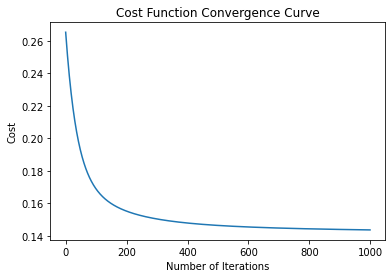

In [181]:
lgr = LogisticRegression(0.001, 0, 1000)
lgr.fit(df, 'Churn')

[0.25]


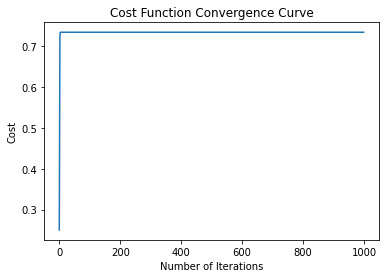

array([[ 94.44371854],
       [155.56790906],
       [-85.3787376 ],
       [ 88.08814134],
       [267.16951987],
       [200.47932748],
       [266.26601354],
       [361.56494716],
       [372.34991373],
       [261.95209771],
       [200.47932748],
       [271.48343569],
       [360.43925542],
       [ 72.6228652 ],
       [300.85274026],
       [340.90479402],
       [393.01006687],
       [480.82190798],
       [253.09295291],
       [346.20402849],
       [387.7108324 ],
       [287.43405602],
       [200.47932748],
       [246.00147738],
       [182.44173563],
       [183.01190917],
       [183.47586611],
       [184.98534997],
       [314.79181104],
       [185.43078231],
       [233.69226754],
       [263.05253952],
       [200.47932748],
       [270.38299388],
       [278.32766234],
       [255.10787107],
       [200.47932748],
       [ 72.6228652 ],
       [661.29199569],
       [264.93142504],
       [200.47932748],
       [268.50410836],
       [288.85135017],
       [200

In [170]:
lgr_2 = LogisticRegression(0.01, 0, 1000)
lgr_2.fit_sigmoid(df, 'Churn')
lgr_2.weights

In [174]:
lgr_2.sigmoid(np.array([[1,2,3,4]]))

array([[1., 1., 1., 1.]])

In [ ]:
test = df.copy()

In [81]:
b = np.array([[1,2], [3,4]]) * np.array([[1,2], [3,4]])
b

array([[ 1,  4],
       [ 9, 16]])

In [84]:
a = np.array([[1,2], [3,4]]) @ np.array([[1,2], [3,4]])
0.2*a

array([[1.4, 2. ],
       [3. , 4.4]])

In [82]:
1 - (a - b)

array([[-5, -5],
       [-5, -5]])

In [83]:
1 - np.array([[1,2,3,4]])

array([[ 0, -1, -2, -3]])